In [35]:
from sasha_tools import *
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score

In [2]:
df_eval = pd.read_csv('eval_result.csv')

In [27]:
df_eval['edinici'] = 1
df_eval['predict_logit'] = np.log(df_eval['predict'] / (1 - df_eval['predict']))

df_eval['month'] = pd.to_datetime(df_eval['date']).dt.year * 100 + pd.to_datetime(df_eval['date']).dt.month

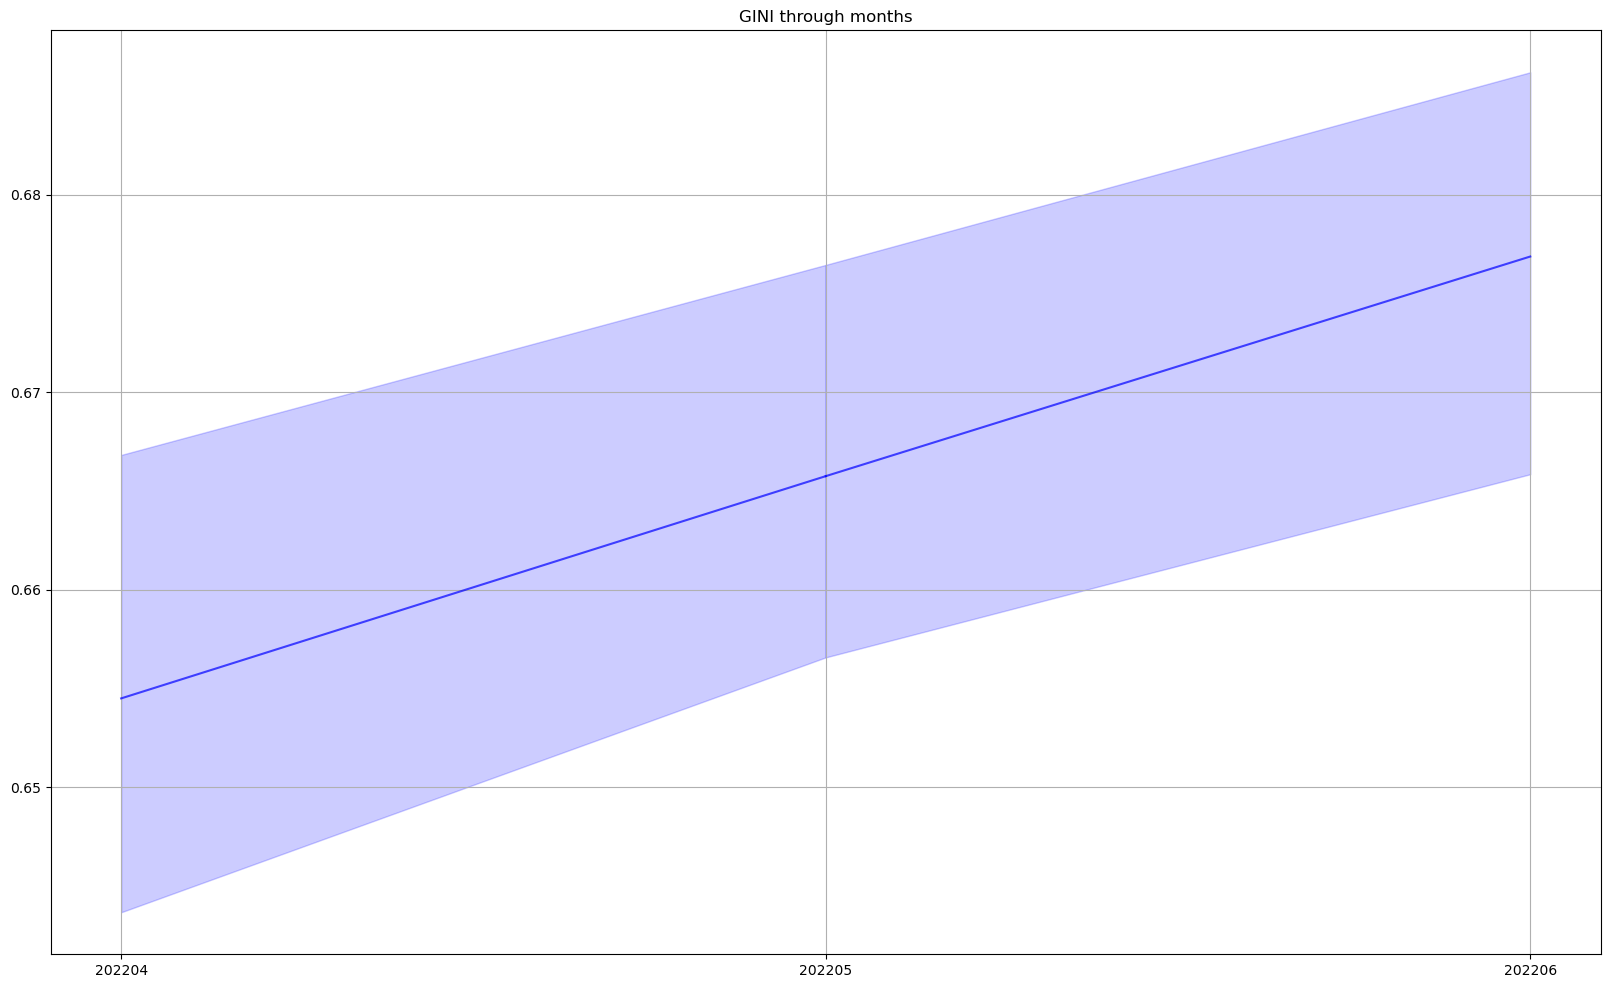

In [41]:
#Lets check a monthly gini
months = sorted(df_eval['month'].unique())

plt.figure(figsize = (20, 12))

month_median, month_q25, month_q75 = [], [], []
for m in months:
    m_indx = (df_eval['month'] == m)
    bootstrap_indecies  = get_bootstrap_indices(df_eval[m_indx].index, 200)
    bootstrap_gini = []
    for indx in bootstrap_indecies:
        bootstrap_gini.append(2 * roc_auc_score(df_eval.loc[indx, 'TARGET'].values, df_eval.loc[indx, 'predict'].values) - 1)
    
    month_median.append(np.median(bootstrap_gini))
    month_q25.append(np.quantile(bootstrap_gini, 0.25))
    month_q75.append(np.quantile(bootstrap_gini, 0.75))


for i in range(len(months) - 1):
    plt.plot([i, i + 1], [month_median[i], month_median[i + 1]], color = 'blue', alpha = 0.7)
    plt.fill_between([i, i + 1], 
                     [month_q25[i], month_q25[i + 1]],
                        [month_q75[i], month_q75[i + 1]],
                        color = 'blue', alpha = 0.2
                       )

plt.xticks(range(len(months)), months)
plt.grid()
plt.title('GINI through months')
plt.show()

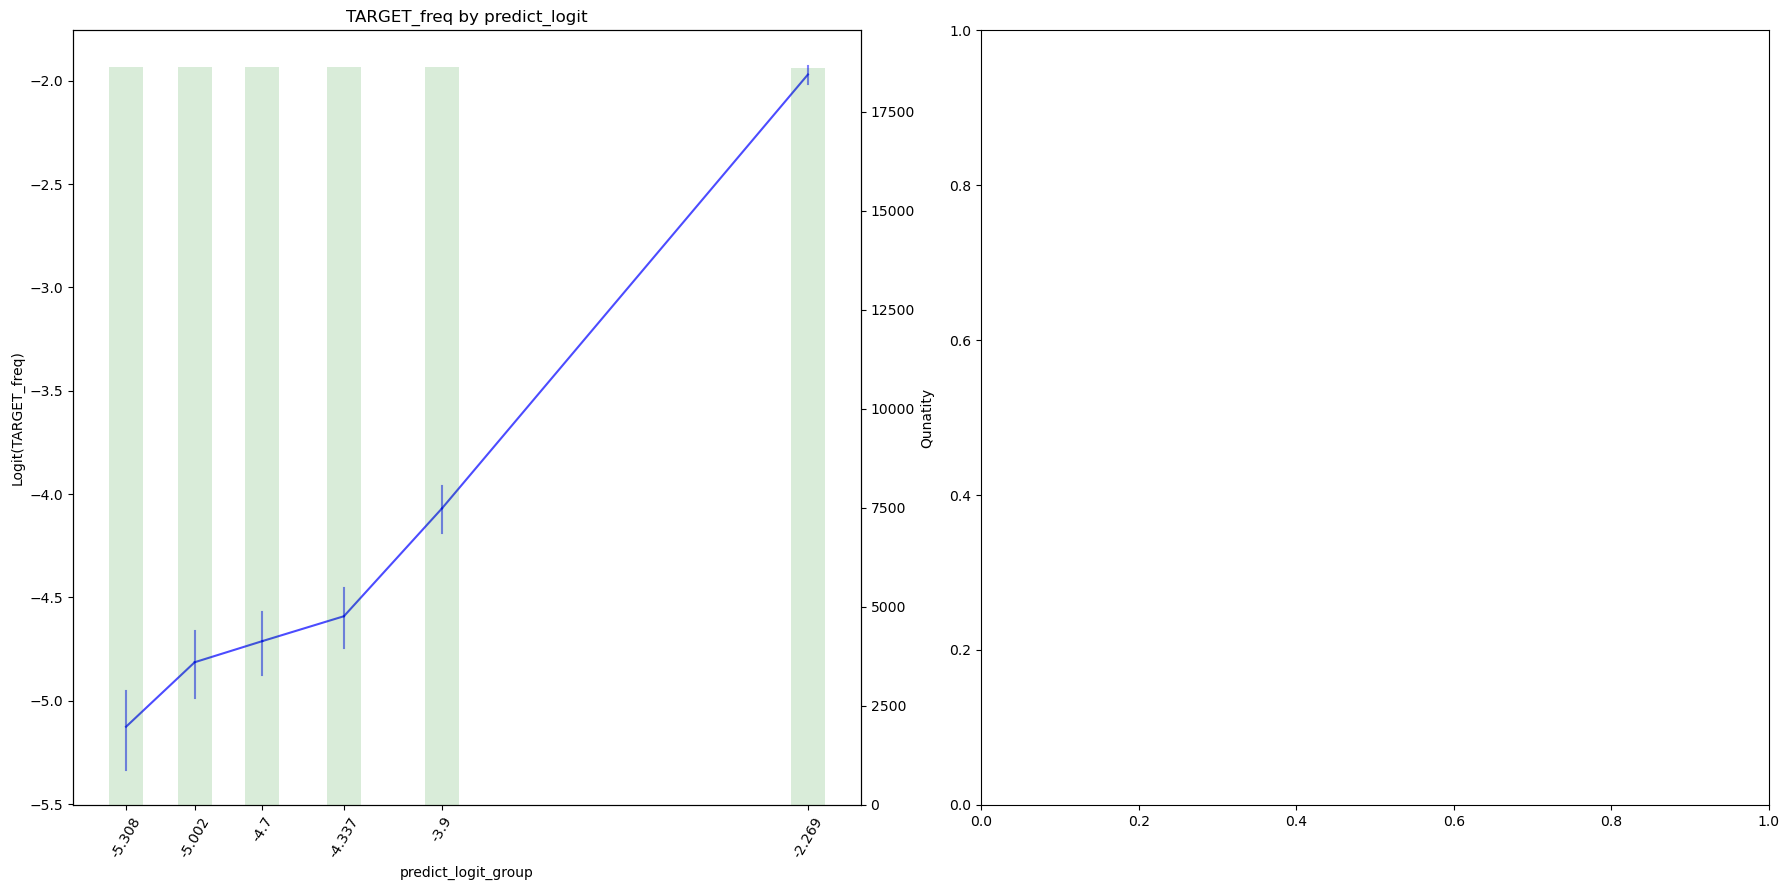

UnboundLocalError: local variable 'df_plot2' referenced before assignment

In [28]:
#Lift is 17.8
qwe = one_dim_analysis(df = df_eval,
                prop = 'predict_logit',
                weight = 'edinici',
                target = 'TARGET',
                time = 'quarter',
                split_group_flag = True,
                n_groups = 6,
                time_flag = False,
                bootstrap = False
                )